# Домашнее задание
## Задание 1
Реализуйте класс ```LinearRegressionSGD``` c обучением и c применением линейной регрессии, построенной с помощью стохастического градиентного спуска, с заданным интерфейсом.

Обратите внимание на следуюшие моменты:
- Схожий класс использовался в лекции
- Выбирайте **10** случайных сэмплов (равномерно) каждый раз. 
- Используйте параметры по умолчанию (epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8)
- Выход из цикла осуществуется по сравнению 2-нормы разницы весов с epsilon, а функция потерь - MSE.


Визуализируйте траекторию градиентного спуска (как в лекции)


In [161]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

np.random.seed(0)

In [162]:
from sklearn.base import BaseEstimator

class LinearRegressionSGD(BaseEstimator):

    def __init__(self, epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8):
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.w_history = []
        self.grad_history = []

    def fit(self, X, y):
        l, d = X.shape
        if self.w0 is None:
            self.w0 = np.zeros(d) 
        self.w = self.w0
        for i in range(self.max_steps):
            self.w_history.append(self.w)
            w_new = self.w - self.alpha * self.calc_gradient(X, y)
            if (np.linalg.norm(self.w - w_new) < self.epsilon):
                break
            self.w = w_new
        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        l, d = X.shape
        for i in range(l):
            y_pred.append(np.dot(X[i], self.w))
        return np.array(y_pred)

    def calc_gradient(self, X, y):
        l, d = X.shape
        gradient = []
        random_index = np.random.randint(0, l)
        for j in range(d):
            dQ = (2/l) * X[random_index, j] * (np.dot(X[random_index], self.w) - y[random_index])
            gradient.append(dQ)
        self.grad_history.append(gradient)
        return np.array(gradient)

Визуализация траектории градиентного спуска

In [163]:
n_features = 2
n_objects = 300
num_steps = 100

np.random.seed(1)
X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_0 = np.random.uniform(-2, 2, (n_features))

In [164]:
w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2

for i in range(num_steps):
    w -= 2 * step_size * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
    w_list.append(w.copy())
w_list = np.array(w_list)

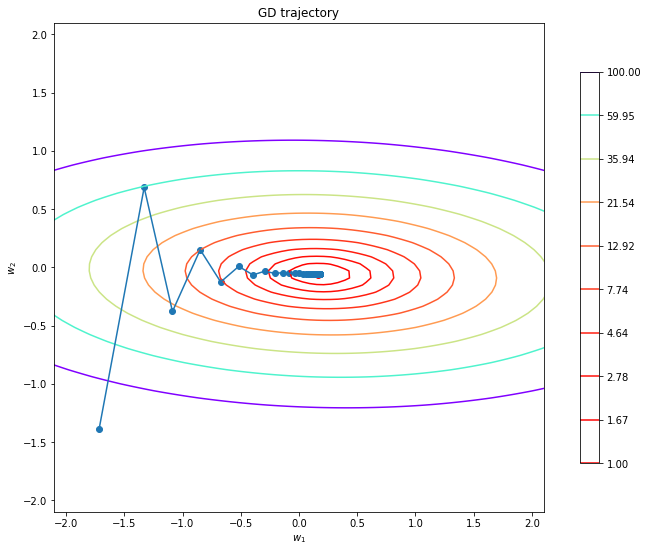

In [165]:
A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((-2.1, 2.1))
plt.ylim((-2.1, 2.1))
plt.gca().set_aspect('equal')


CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')


plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Визуализация траектории стохастического градиентного спуска

In [166]:
w = w_0.copy()
w_list = [w.copy()]

for i in range(num_steps):
    step_size = step_size_0 / ((i+1)**0.51)
    sample = np.random.randint(n_objects, size=batch_size)
    w -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / batch_size
    w_list.append(w.copy())
w_list = np.array(w_list)

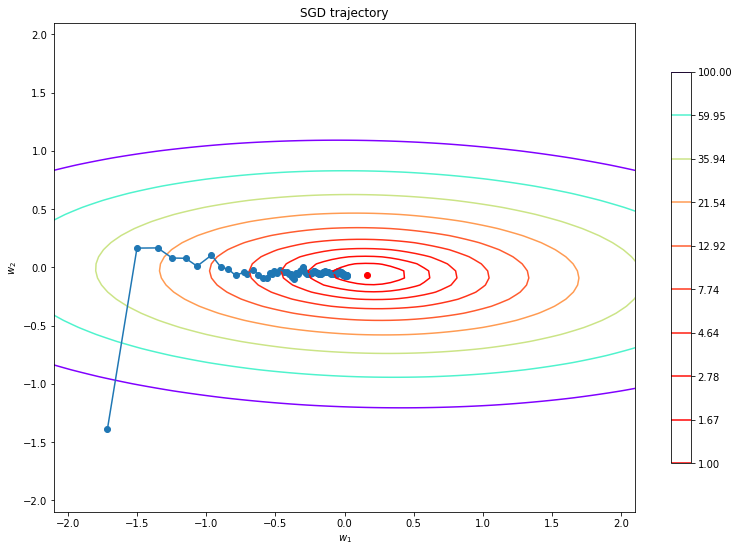

In [167]:
A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((-2.1, 2.1))
plt.ylim((-2.1, 2.1))


CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()